# Coefficients of the profle caused by size effects


Following Gubicza 2014, we first define the variable 
$$
\kappa = \frac{2\sin \theta}{\lambda},
$$

where $\theta$ is the scattering angle, $\lambda$ is the X-ray wavelength. Assuming a lognormal distribution of crystallite size, we can parametrize it using two parameters. These are $m$, corresponding to the median crystallite size and $\sigma$, denoting the standard deviation. The Fourier-transform of the profile associated to size effects is given by
$$
A_S(L) = \frac{1}{2}\text{erfc}\left(\frac{\log (|L|/m)}{\sqrt{2}\sigma} - 1.5 \sqrt{2}\sigma\right) - \frac{3}{4me^{8.125\sigma^2}}|L|\text{erfc}\left(\frac{\log (|L|/m)}{\sqrt{2}\sigma}-\sqrt{2}\sigma\right) + \frac{3}{4m^3 e^{10.125\sigma^2}}|L|^3\text{erfc}\left(
 \frac{\log (|L|/m)}{\sqrt{2}\sigma}\right)$$
 
The variable $L$ is related to $\kappa$ through the Fourier-transform

$$
I(\kappa) = \int_{-\infty}^\infty A_S(L)e^{2\pi i\kappa L }dL.
$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftfreq, fft, ifft, ifftshift, fftshift


In [9]:
import matplotlib

In [10]:
%load_ext autoreload
%autoreload 2
%aimport  diffaultpy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from diffaultpy.peak_shapes import Peak, generate_multiple_peaks


In [12]:
N = 1024 * 8 


Here we initialize a Peak object

with the following properties:

$$a =0.36, b =0.255, C_{h00}=0.1. $$


The computational domain will correspond to $\kappa \in [0, \kappa_{max}]$ with $\kappa_{max}=14$. 

In [13]:
lattice_constant = 0.36
burgers_vector = 0.255


## Effect of the median crystallite size and standard deviation



Let us plot the peak profiles for varying $m$.


In [2]:
# for latex rendered text, uncomment this cell
# from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':14})
# rc('text', usetex=True)

In [14]:
h, k, l = 2, 0, 0
kappa_max = np.sqrt(14) / lattice_constant
# this is to ensure we see peaks up to h^2 + k^2 + l^2 = 14
single_peak = Peak(kappa_max, N, 0.1, 0.255, lattice_constant, stacking_or_twin_fault='stacking')
lengthOfFrame = 2 * single_peak.max_range_diffraction_vector
L = single_peak.math.fftfreq(single_peak.Nfourier, 
                                            lengthOfFrame / single_peak.Nfourier).reshape(-1, 1) + 1e-16
N = len(L)
dell = L[1,:] - L[0,:]
factor = dell * N # normalization factor for the Fourier transform


Text(0.5, 0, '$\\kappa - \\kappa_{hkl}$')

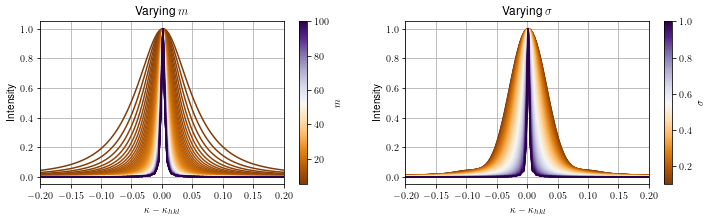

In [15]:
m_s = np.linspace(5, 100, 100)
sigmas = np.linspace(0.1, 1, 100)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 3))
norm = matplotlib.colors.Normalize(
    vmin=m_s.min(),
    vmax=m_s.max())
colormap = matplotlib.cm.PuOr
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])


for m in m_s:
    ft_size = single_peak.fourier_coefficients_size(np.abs(L),
                                                      m, 0.5) 
    profile = np.abs(ifftshift( ifft ( ft_size, axis = 0), axes = 0)) * factor
    max_value = np.max(profile)
    axes[0].plot(single_peak.diffraction_vectors_dimensionless, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(m))#
plt.colorbar(scalar_mappable_colormap, ax = axes[0], label = '$m$')
axes[0].set_xlim(-0.5, 0.5)

##

norm = matplotlib.colors.Normalize(
    vmin=sigmas.min(),
    vmax=sigmas.max())
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])
for s in sigmas:
    ft_size = single_peak.fourier_coefficients_size(np.abs(L),
                                                      20, s) 
    profile = np.abs(ifftshift( ifft ( ft_size, axis = 0), axes = 0)) * factor
    max_value = np.max(profile)
    axes[1].plot(single_peak.diffraction_vectors_dimensionless, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(s))#
plt.colorbar(scalar_mappable_colormap, ax = axes[1], label = '$\sigma$')
for a in axes:
    a.set_xlim(-0.2, 0.2)
    a.grid()
    a.set_ylabel('Intensity')
axes[0].set_title('Varying $m$')
axes[1].set_title('Varying $\\sigma$')

axes[0].set_xlabel('$\kappa - \kappa_{hkl}$')
axes[1].set_xlabel('$\kappa - \kappa_{hkl}$')